In [103]:
# Detección y Reconocimiento de Caras

# Importamos las librerias necesarias
import cv2 # Importamos OpenCV para procesamiento de imagenes
import numpy as np # Numpy para manejar arrays
import matplotlib.pyplot as plt # Matplotlib para visualización
from google.colab.patches import cv2_imshow # Importamos funcion para mostrar imagenes en Colab

In [104]:
#1.- Descargue las clasificaciones en cascada pre-entrenados para  deteccion facial
# Estos son archivos XML con patrones pre-entrenados para detección
!wget -O haarcascade_frontalface_default.xml https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget -O haarcascade_eye.xml https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_eye.xml

--2025-10-04 16:11:02--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2025-10-04 16:11:02--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  5.34MB/s    in 0.2s    

20

In [105]:
# Cargar clasificadores cascada
# Cargamos el clasificador para rostros frontales
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Cargamos la clasificación para los ojos
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [106]:
# 2. Cargar una imagen de ejemplo con rostros (usamos la imagen de lena.jpg que sabemos es accesible)
from urllib.request import urlopen # para abrir UMLS

In [107]:
# URL de una imagen de ejemplo con un rostro
url = 'https://s10367.pcdn.co/wp-content/uploads/2021/09/Sacred-Heart-White.png'

# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array como una imagen usando OPENCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# Creamos una copia para visualización RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convertimos en escala de grises para la deteccion (mejora eficiencia)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [108]:
# Abrimos la URL y leemos los bytes en la imagen
from urllib.request import urlopen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype='uint8')
# Decodificamos el array como una imagen usando OPENCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# Creamos una copia para visualización RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convertimos en escala de grises para la deteccion (mejora eficiencia)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [109]:
# 3. Detectar Rostros en la imagen
# faces contiene las coordenadas (x,y,u,h) de cada rostro detectado
faces = face_cascade.detectMultiScale(
    gray_image, # Imagen en escala de grises
    scaleFactor=1.1, # Factor de escala para crer la piramide de imagenes
    minNeighbors=5, #Cuantos vecinos debe tener cada candidato para ser aceptado
    minSize=(50, 30) # Tamaño minimo posible de una cara
)

In [110]:
# 4. Crear copia en la imagen para dibujar los resultados
result_image = image_rgb.copy()

In [111]:
# 5. Dibujar rectangulos alrededor de los rostros detectados
for (x, y, u, h) in faces:
  # Dibujamos un rectangulo verde alrededor de la cara (x, y, ancho, alto,)
  cv2.rectangle(result_image, (x, y), (x+u, x+h), (0, 255, 0), 2)

  # Region de interes en escala de grises (para la deteccion de ojos)
  roi_gray = gray_image[y:y+h, x:x+u]
  # Region de interes en color (para dibujar los ojos)
  roi_color = result_image[y:y+h, x:x+u]

  # Detectamos los ojos dentro de la region facial
  eyes = eye_cascade.detectMultiScale(
      roi_gray,
      scaleFactor=1.1,
      minNeighbors=5,
      minSize=(5, 5)
  )

  # Dibujamos rectagules azueles alrededor de los ojos
  for (ex, ey, eu, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex+eu, ey+eh), (255, 0, 0), 2)

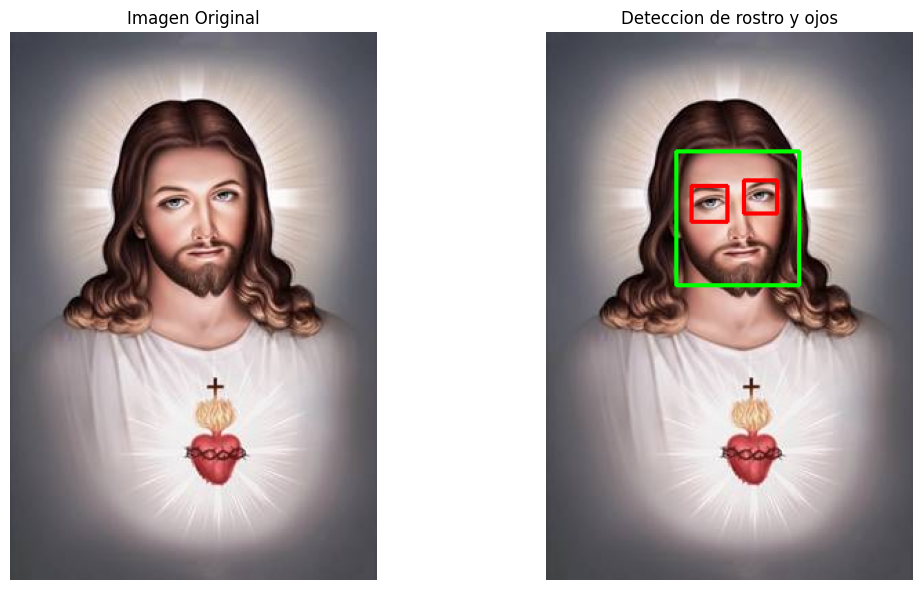

In [112]:
#6. Visualización de los resultados
plt.figure(figsize=(12,6)) # Creamos una figura con tamaño especifico

#Imagen original
plt.subplot(1, 2, 1) # Creamos el subplot en la posicion 1
plt.title('Imagen Original') # Añadimos titulo
plt.imshow(image_rgb) # Mostramos la imagen original
plt.axis('off') # Ocultamos los ejes

# Imagen con detecciones
plt.subplot(1, 2, 2) # Creamos el subplot en la posicion 1
plt.title('Deteccion de rostro y ojos') # Añadimos titulo
plt.imshow(result_image) # Mostramos la imagen con las detecciones
plt.axis('off') # Ocultamos los ejes

plt.tight_layout() # ajustamos el layout para que no se superponga los titulos
plt.show() # Mostramos la figura completa